<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/UMap_Clustering%26Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset source** -https://archive.ics.uci.edu/dataset/53/iris

**Iris dataset**
To demonstrate the application of these four methods we will use the iris dataset a widely used dataset in ML for demonstration purposes. It consists of measurements in centimetres of four variables and one class. Variable are:

sepal length and sepal width
petal length and petal width.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder


In [2]:
!pip install seaborn
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=cae7b3c2e92f6ab986b48c92e4c27d20c90723d9a0a167b7ba07cccd3f2368b9
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
dp="/content/drive/MyDrive/DM/iris.csv"
iris = pd.read_csv(dp)

In [7]:

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


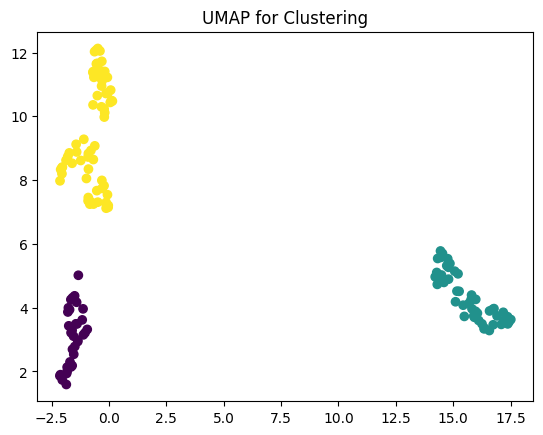

Adjusted Rand Index for UMAP Clustering: 0.7591987071071522


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Accuracy using UMAP Features: 1.00


In [9]:


# UMAP for Clustering
umap_cluster = UMAP(n_components=2, random_state=42)
umap_embedding = umap_cluster.fit_transform(X)

# K-Means clustering on UMAP embeddings
kmeans = KMeans(n_clusters=3, random_state=42)
umap_cluster_labels = kmeans.fit_predict(umap_embedding)

# Visualize UMAP clusters
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=umap_cluster_labels, cmap='viridis')
plt.title('UMAP for Clustering')
plt.show()

# Evaluate clustering performance using Adjusted Rand Index
ari_score = adjusted_rand_score(y, umap_cluster_labels)
print(f"Adjusted Rand Index for UMAP Clustering: {ari_score}")

# UMAP for Classification Feature Extraction
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# UMAP for feature extraction
umap_classifier = UMAP(n_components=2, random_state=42)
umap_features_train = umap_classifier.fit_transform(X_train)
umap_features_test = umap_classifier.transform(X_test)

# Train a RandomForest classifier on UMAP features
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(umap_features_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(umap_features_test)

# Evaluate classification performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using UMAP Features: {accuracy:.2f}")
